<a href="https://colab.research.google.com/github/iseequeue/pytorch/blob/main/02_nn_basicc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [12]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [5]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

800 200


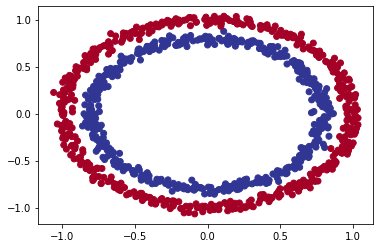

In [36]:
from sklearn.datasets import make_circles
 
n_samples = 1000

Circles, Circles_labels = make_circles(n_samples, noise = 0.03, random_state=42)

circles = pd.DataFrame({"X1": Circles[:, 0],
                        "X2": Circles[:, 1],
                        "label" : Circles_labels})

plt.scatter(x=Circles[:, 0], y=Circles[:, 1], c=Circles_labels, cmap = plt.cm.RdYlBu);

# 2. Turn data into tensors
X_circle = torch.from_numpy(Circles).type(torch.float)
y_circle = torch.from_numpy(Circles_labels).type(torch.float)

# 3. Split into train and test sets
X_circle_train, X_circle_test, y_circle_train, y_circle_test = train_test_split(X_circle,
    y_circle,
    test_size=0.2,
    random_state=42
)
print(len(X_circle_train), len(X_circle_test))

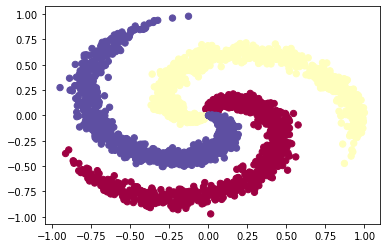

2400 600


In [65]:
# Code for creating a spiral dataset from CS231n


N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

Spirals = np.zeros((N*K,D)) # data matrix (each row = single example)
Spirals_labels = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  Spirals[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Spirals_labels[ix] = j
# lets visualize the data
plt.scatter(Spirals[:, 0], Spirals[:, 1], c=Spirals_labels, s=40, cmap=plt.cm.Spectral)
plt.show()

# 2. Turn data into tensors
X_spiral = torch.from_numpy(Spirals).type(torch.float)
y_spiral = torch.from_numpy(Spirals_labels).type(torch.LongTensor)

# 3. Split into train and test sets
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral,
    y_spiral,
    test_size=0.2,
    random_state=42
)
print(len(X_spiral_train), len(X_spiral_test))

800 200


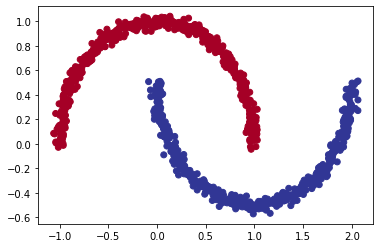

In [57]:
from sklearn.datasets import make_moons
 
n_samples = 1000

Moons, Moons_labels = make_moons(n_samples, noise = 0.03, random_state=42)


plt.scatter(x=Moons[:, 0], y=Moons[:, 1], c=Moons_labels, cmap = plt.cm.RdYlBu);

# 2. Turn data into tensors
X_moon = torch.from_numpy(Moons).type(torch.float)
y_moon = torch.from_numpy(Moons_labels).type(torch.float)

# 3. Split into train and test sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon,
    y_moon,
    test_size=0.2,
    random_state=42
)
print(len(X_moon_train), len(X_moon_test))

800 200


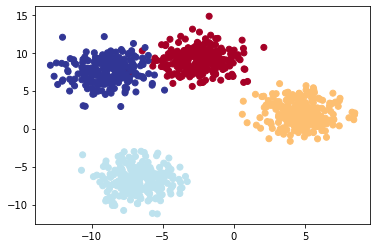

In [6]:
from sklearn.datasets import make_blobs
 
n_samples = 1000

Blobs, Blobs_labels = sklearn.datasets.make_blobs(n_samples=n_samples, n_features=2, centers=4, cluster_std=1.5, center_box=(-10.0, 10.0),
                                                  shuffle=True, random_state=42)


plt.scatter(x=Blobs[:, 0], y=Blobs[:, 1], c=Blobs_labels, cmap = plt.cm.RdYlBu);

# 2. Turn data into tensors
X_blob = torch.from_numpy(Blobs).type(torch.float)
y_blob = torch.from_numpy(Blobs_labels).type(torch.LongTensor)

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=42
)
print(len(X_blob_train), len(X_blob_test))

In [44]:
Circles.dtype, Moons.dtype, Blobs.dtype, Spirals.dtype

(dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'))

## 0. Classyfing blobs


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_0 = BlobModel(input_features=2, 
                    output_features=4, 
                    hidden_units=8).to(device)
model_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.1) 

In [10]:
# Make prediction logits with model
y_logits = model_0(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.8776,  0.7446, -1.5704,  1.1962],
        [ 1.2419, -0.0767, -1.1268, -0.9899],
        [ 0.6851, -0.0915,  1.5241, -1.0794],
        [-0.7783,  0.6502, -0.8781,  0.9327],
        [ 0.0162,  0.4745, -2.2991,  0.4940]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0689, 0.3488, 0.0344, 0.5479],
        [0.6810, 0.1822, 0.0637, 0.0731],
        [0.2535, 0.1166, 0.5865, 0.0434],
        [0.0861, 0.3593, 0.0779, 0.4766],
        [0.2330, 0.3684, 0.0230, 0.3756]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [11]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.38893, Acc: 37.88% | Test Loss: 0.87665, Test Acc: 66.00%
Epoch: 10 | Loss: 0.24427, Acc: 98.12% | Test Loss: 0.21430, Test Acc: 98.00%
Epoch: 20 | Loss: 0.10678, Acc: 99.12% | Test Loss: 0.09789, Test Acc: 99.50%
Epoch: 30 | Loss: 0.07043, Acc: 99.12% | Test Loss: 0.06316, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05478, Acc: 99.25% | Test Loss: 0.04744, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04638, Acc: 99.25% | Test Loss: 0.03878, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04123, Acc: 99.25% | Test Loss: 0.03338, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03780, Acc: 99.25% | Test Loss: 0.02971, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03536, Acc: 99.25% | Test Loss: 0.02707, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03356, Acc: 99.25% | Test Loss: 0.02508, Test Acc: 99.50%


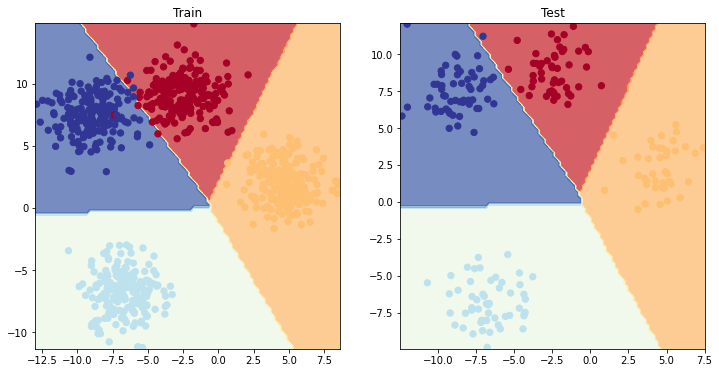

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

## 1. Classifying circles

In [49]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModel().to(device)
model_1


CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [50]:
# loss_fn = nn.BCEWithLogitsLoss()

# oprimizer = torch.optim.Adam(params=model_1.parameters())

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters())

In [51]:
# Fit the model
torch.manual_seed(42)
epochs = 5000

# Put all data on target device
X_train, y_train = X_circle_train.to(device), y_circle_train.to(device)
X_test, y_test = X_circle_test.to(device), y_circle_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69310, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68481, Accuracy: 52.88% | Test Loss: 0.68289, Test Accuracy: 57.00%
Epoch: 200 | Loss: 0.66289, Accuracy: 64.50% | Test Loss: 0.65978, Test Accuracy: 65.00%
Epoch: 300 | Loss: 0.60675, Accuracy: 78.38% | Test Loss: 0.60702, Test Accuracy: 76.50%
Epoch: 400 | Loss: 0.50021, Accuracy: 95.12% | Test Loss: 0.51355, Test Accuracy: 94.00%
Epoch: 500 | Loss: 0.38017, Accuracy: 98.88% | Test Loss: 0.40529, Test Accuracy: 98.50%
Epoch: 600 | Loss: 0.26392, Accuracy: 99.75% | Test Loss: 0.29215, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.18551, Accuracy: 99.62% | Test Loss: 0.21724, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.13565, Accuracy: 99.75% | Test Loss: 0.16580, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.10224, Accuracy: 99.88% | Test Loss: 0.13114, Test Accuracy: 100.00%
Epoch: 1000 | Loss: 0.08003, Accuracy: 99.88% | Test Loss: 0.10610, Test Accuracy: 100.00%
Epoch: 1100 | Loss: 

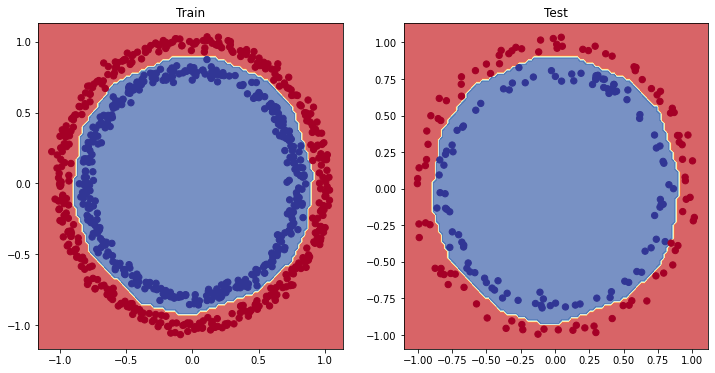

In [52]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_circle_train, y_circle_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_circle_test, y_circle_test) # model_3 = has non-linearity

## Classifying moons

In [53]:
model_2 = CircleModel().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_2.parameters())

In [58]:
# Fit the model
torch.manual_seed(42)
epochs = 5000

# Put all data on target device
X_train, y_train = X_moon_train.to(device), y_moon_train.to(device)
X_test, y_test = X_moon_test.to(device), y_moon_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69537, Accuracy: 37.75% | Test Loss: 0.69501, Test Accuracy: 43.50%
Epoch: 100 | Loss: 0.60710, Accuracy: 73.62% | Test Loss: 0.61381, Test Accuracy: 70.00%
Epoch: 200 | Loss: 0.45230, Accuracy: 79.75% | Test Loss: 0.46920, Test Accuracy: 75.50%
Epoch: 300 | Loss: 0.35199, Accuracy: 83.88% | Test Loss: 0.36933, Test Accuracy: 79.00%
Epoch: 400 | Loss: 0.28205, Accuracy: 86.75% | Test Loss: 0.29022, Test Accuracy: 86.00%
Epoch: 500 | Loss: 0.23777, Accuracy: 88.75% | Test Loss: 0.24058, Test Accuracy: 91.00%
Epoch: 600 | Loss: 0.19564, Accuracy: 91.12% | Test Loss: 0.19316, Test Accuracy: 92.50%
Epoch: 700 | Loss: 0.15433, Accuracy: 93.62% | Test Loss: 0.14783, Test Accuracy: 96.00%
Epoch: 800 | Loss: 0.11654, Accuracy: 95.75% | Test Loss: 0.10804, Test Accuracy: 97.00%
Epoch: 900 | Loss: 0.08199, Accuracy: 97.62% | Test Loss: 0.07399, Test Accuracy: 99.00%
Epoch: 1000 | Loss: 0.05449, Accuracy: 99.25% | Test Loss: 0.04833, Test Accuracy: 99.50%
Epoch: 1100 | Loss: 0.

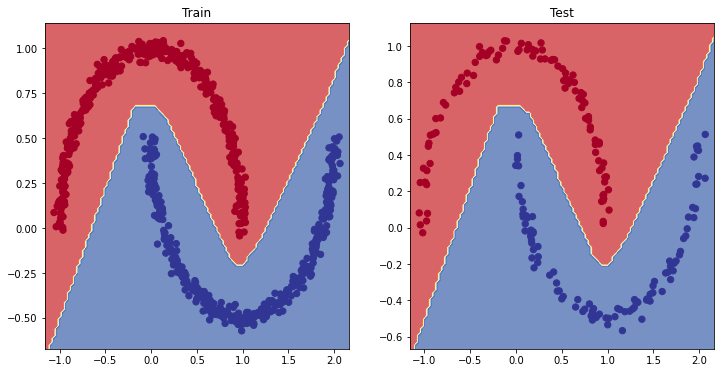

In [60]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_moon_train, y_moon_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_moon_test, y_moon_test) # model_3 = has non-linearity

## Classifying Spirals

In [61]:
# Build model
class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)


model_3 = SpiralModel(input_features=2, 
                    output_features=4, 
                    hidden_units=8).to(device)
model_3

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [73]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters()) 

In [74]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 5000

# Put data to target device
X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_spiral_test = X_spiral_test.to(device), y_spiral_test.to(device)

for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_spiral_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_spiral_train) 
    acc = accuracy_fn(y_true=y_spiral_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_spiral_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_spiral_test)
      test_acc = accuracy_fn(y_true=y_spiral_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.99086, Acc: 45.04% | Test Loss: 0.99675, Test Acc: 42.00%
Epoch: 10 | Loss: 0.98235, Acc: 44.04% | Test Loss: 0.98757, Test Acc: 41.00%
Epoch: 20 | Loss: 0.97409, Acc: 45.17% | Test Loss: 0.97891, Test Acc: 42.33%
Epoch: 30 | Loss: 0.96601, Acc: 45.96% | Test Loss: 0.97070, Test Acc: 43.83%
Epoch: 40 | Loss: 0.95798, Acc: 46.50% | Test Loss: 0.96290, Test Acc: 44.00%
Epoch: 50 | Loss: 0.94996, Acc: 47.12% | Test Loss: 0.95523, Test Acc: 44.67%
Epoch: 60 | Loss: 0.94191, Acc: 47.54% | Test Loss: 0.94738, Test Acc: 45.17%
Epoch: 70 | Loss: 0.93377, Acc: 48.08% | Test Loss: 0.93932, Test Acc: 45.83%
Epoch: 80 | Loss: 0.92550, Acc: 48.29% | Test Loss: 0.93109, Test Acc: 46.00%
Epoch: 90 | Loss: 0.91705, Acc: 48.83% | Test Loss: 0.92270, Test Acc: 46.67%
Epoch: 100 | Loss: 0.90836, Acc: 49.21% | Test Loss: 0.91399, Test Acc: 47.00%
Epoch: 110 | Loss: 0.89938, Acc: 49.71% | Test Loss: 0.90501, Test Acc: 48.33%
Epoch: 120 | Loss: 0.88996, Acc: 50.42% | Test Loss: 0.89565, T

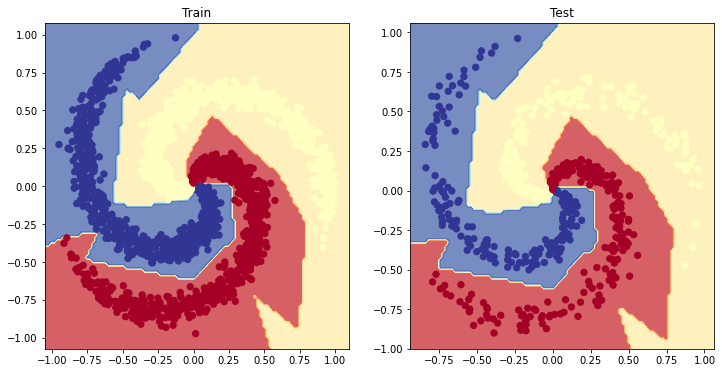

In [75]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_spiral_train, y_spiral_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_spiral_test, y_spiral_test) # model_3 = has non-linearity